In [1]:
from scipy.constants import R
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.ticker import EngFormatter,StrMethodFormatter

In [2]:
S_O2=205.028552
S_Pb=64.76832
H_PbO=-219000
S_PbO=66.5
S_Fe=27.27968
H_Fe3O4=-1118.3832e3
S_Fe3O4=146.44
H_Fe2O3=-824.248e3
S_Fe2O3=87.40376
S_Ni=29.87376
H_NiO=-239.7432e3
S_NiO=37.99072
H_ZrO2=-1097.46e3
S_ZrO2=50.34
S_Zr=39.0

In [3]:
T=np.linspace(273.15,1000,1000)

<IPython.core.display.Javascript object>


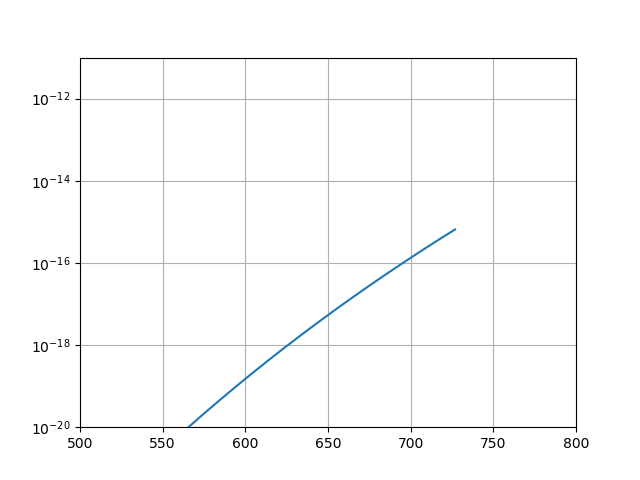

In [4]:
%matplotlib notebook
plt.semilogy(T-273.15,np.exp((2*H_NiO-(2*S_NiO-S_O2-2*S_Ni)*(T))/(R*T)))
plt.ylim(1e-20,1e-11)
plt.xlim(500,800)
plt.grid()

<IPython.core.display.Javascript object>


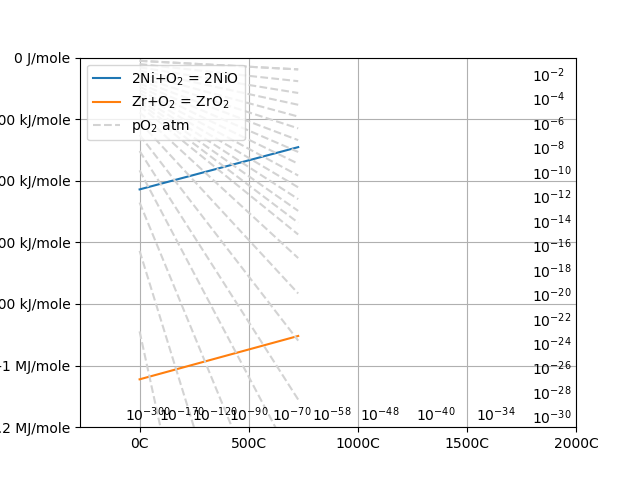

In [5]:
%matplotlib notebook
fig, ax = plt.subplots()
formatterJ = EngFormatter(unit='J/mole')
formatterT = StrMethodFormatter('{x:.0f}C')
#formatterT = EngFormatter(unit='K')
ax.yaxis.set_major_formatter(formatterJ)
ax.xaxis.set_major_formatter(formatterT)

#ax.plot(T-273.15,2*H_PbO-(2*S_PbO-S_O2-2*S_Pb)*(T),label=r"Pb+O$_2$ = PbO")
#ax.plot(T-273.15,6*H_Fe2O3-4*H_Fe3O4-(6*S_Fe2O3-4*S_Fe3O4-S_O2)*T,label=r"4Fe$_3$O$_4$+O$_2$ = 6Fe$_2$O$_3$")
ax.plot(T-273.15,2*H_NiO-(2*S_NiO-2*S_Ni-S_O2)*T,label=r"2Ni+O$_2$ = 2NiO")
ax.plot(T-273.15,H_ZrO2-(S_ZrO2-S_Zr-S_O2)*T,label=r"Zr+O$_2$ = ZrO$_2$")
ax.plot(T-273.15,np.log((10**(-2)))*R*T,"--",color="lightgrey",label="pO$_2$ atm")
for oc in range(-2,-32,-2):
    ax.plot(T-273.15,np.log((10**oc))*R*T,"--",color="lightgrey")
    ax.text(1800,np.log((10**oc))*R*(1800+273.15),r"10$^{"+str(oc)+"}$")
for oc in [-34,-40,-48,-58,-70,-90,-120,-170,-300]:
    ax.plot(T-273.15,np.log((10**oc))*R*T,"--",color="lightgrey")
    ax.text(-1.18e6/(np.log((10**oc))*R)-273.15,-1.18e6,r"10$^{"+str(oc)+"}$")
plt.ylim(-1.2e6,0)
plt.xlim(-273.15,2000)
ax.grid()
ax.legend(loc=2)

In [6]:
HPbO-SPbO*300+205/2*300+64*300

NameError: name 'HPbO' is not defined

In [7]:
T0=273.15+26
print(H_Fe2O3-(S_Fe2O3-2*S_Fe-1.5*S_O2)*T0)
T0=298
print(H_Fe2O3-(S_Fe2O3-2*S_Fe-1.5*S_O2)*T0)
T0=298.6
print(H_Fe2O3-(S_Fe2O3-2*S_Fe-1.5*S_O2)*T0)

-742071.9652638
-742387.868456
-742223.0493992


In [10]:
T0=298.6
print(H_Fe3O4-(S_Fe3O4-3*S_Fe-2*S_O2)*T0)

-1015229.9954015999


In [11]:
[x for x in range(-2,-40,-2)]

[-2,
 -4,
 -6,
 -8,
 -10,
 -12,
 -14,
 -16,
 -18,
 -20,
 -22,
 -24,
 -26,
 -28,
 -30,
 -32,
 -34,
 -36,
 -38]

In [12]:
R

8.3144598

In [8]:
import thermopy
from thermopy import nasa9polynomials as nasa9
from thermopy import burcat
import numpy as np

In [9]:
db = nasa9.Database()

<IPython.core.display.Javascript object>


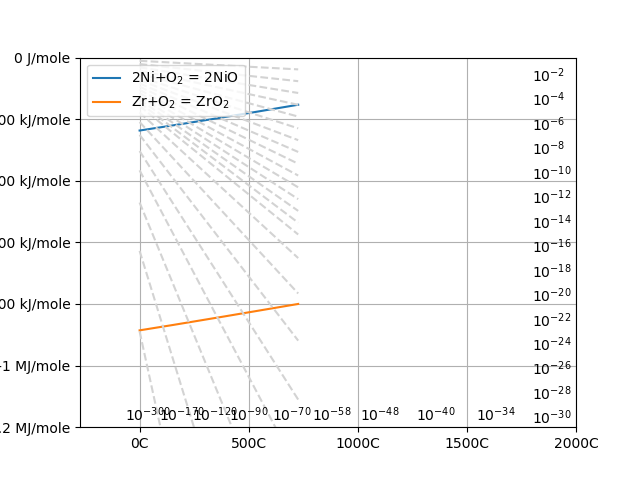

In [10]:
O2=db.set_compound("O2")
NiO=db.set_compound("NiO")
Ni=db.set_compound("Ni")
Zr=db.set_compound("Zr")
ZrO2=db.set_compound("ZrO2")
G_O2=np.array([O2.gibbs_energy(x) for x in T])
G_Ni=np.array([Ni.gibbs_energy(x) for x in T])
G_NiO=np.array([NiO.gibbs_energy(x) for x in T])
G_Zr=np.array([Zr.gibbs_energy(x) for x in T])
G_ZrO2=np.array([ZrO2.gibbs_energy(x) for x in T])
%matplotlib notebook
fig, ax = plt.subplots()
formatterJ = EngFormatter(unit='J/mole')
formatterT = StrMethodFormatter('{x:.0f}C')
#formatterT = EngFormatter(unit='K')
ax.yaxis.set_major_formatter(formatterJ)
ax.xaxis.set_major_formatter(formatterT)
ax.plot(T-273.15,2*G_NiO-2*G_Ni-G_O2,label=r"2Ni+O$_2$ = 2NiO")
ax.plot(T-273.15,G_ZrO2-G_Zr-G_O2,label=r"Zr+O$_2$ = ZrO$_2$")
#ax.plot(T-273.15,np.log((10**(-2)))*R*T,"--",color="lightgrey",label="pO$_2$ atm")
for oc in range(-2,-32,-2):
    ax.plot(T-273.15,np.log((10**oc))*R*T,"--",color="lightgrey")
    ax.text(1800,np.log((10**oc))*R*(1800+273.15),r"10$^{"+str(oc)+"}$")
for oc in [-34,-40,-48,-58,-70,-90,-120,-170,-300]:
    ax.plot(T-273.15,np.log((10**oc))*R*T,"--",color="lightgrey")
    ax.text(-1.18e6/(np.log((10**oc))*R)-273.15,-1.18e6,r"10$^{"+str(oc)+"}$")
plt.ylim(-1.2e6,0)
plt.xlim(-273.15,2000)
ax.grid()
ax.legend(loc=2)

In [80]:
O2=db.set_compound("O2")

In [11]:
db.list_compound("oxygen")

[('AlOCl', 'aluminum;oxygen(2-);chloride'),
 ('AlOF', 'aluminum;oxygen(2-);fluoride'),
 ('AlO2', 'aluminum;oxygen(2-)'),
 ('AlO2-', 'aluminum;oxygen(2-)'),
 ('Cs2O+', 'dicesium;oxygen(2-)'),
 ('Ga2O', 'gallium;oxygen(2-)'),
 ('K2O+', 'dipotassium;oxygen(2-)'),
 ('Li2O+', 'dilithium;oxygen(2-)'),
 ('N2O3', 'molecular oxygen;nitrous oxide'),
 ('Na2O+', 'disodium;oxygen(2-)'),
 ('O', 'oxygen'),
 ('O+', 'oxygen'),
 ('O-', 'oxygen'),
 ('O2', 'molecular oxygen'),
 ('TiO2', 'oxygen(2-);titanium(4+)'),
 ('WOCl4', 'oxygen(2-);tungsten;tetrachloride'),
 ('WO2Cl2', 'oxygen(2-);tungsten;dichloride'),
 ('Cu2O(cr)', 'copper(1+);oxygen(2-)'),
 ('Cu2O(L)', 'copper(1+);oxygen(2-)'),
 ('FeOCl(cr)', 'iron(3+);oxygen(2-);chloride'),
 ('Fe2O3(cr)', 'iron(3+);oxygen(2-)'),
 ('Fe2O3(cr)', 'iron(3+);oxygen(2-)'),
 ('Fe3O4(cr)', 'iron(2+);iron(3+);oxygen(2-)'),
 ('Fe3O4(cr)', 'iron(2+);iron(3+);oxygen(2-)'),
 ('Fe3O4(L)', 'iron(2+);iron(3+);oxygen(2-)'),
 ('Ga2O3(cr)', 'digallium;oxygen(2-)'),
 ('Ga2O3(L)', 'd

In [12]:
db2=burcat.Database()

In [13]:
N2O=db.set_compound("N2O")
N2=db.set_compound("N2")

In [14]:
N2O.gibbs_energy(1000)

-161175.31552270363

In [15]:
thermopy.constants

<module 'thermopy.constants' from '/usr/lib/python3.6/site-packages/thermopy/constants.py'>

In [16]:
prods=(O2,N2)
reacts=(N2O,)
reacts_coefs=(2,)
prods_coefs=(1,2)

In [17]:
reaction1 = nasa9.Reaction(1000, reacts, prods, reacts_coefs,prods_coefs)
print(reaction1)
print(reaction1.equilibrium_constant())
print(reaction1.gibbs_energy_reaction())

<reaction> +2 N2O  -> +1 O2 +2 N2 
1.9675012682246984e+16
-311943.40673761367


In [18]:
reaction2 = nasa9.Reaction(200, prods,reacts, prods_coefs,reacts_coefs)
print(reaction2)
print(reaction2.equilibrium_constant())
print(reaction2.gibbs_energy_reaction())

<reaction> +1 O2 +2 N2  -> +2 N2O 
3.662700976785766e-51
193117.97777120018


In [19]:
for p in reaction1._products:
    print(p.elements,p.gibbs_energy(1000))

[('O', 2)] -220879.09368728846
[('N', 2)] -206707.47204786623


In [20]:
for p in reaction1._reactants:
    print(p.gibbs_energy(1000))

-161175.31552270363


In [21]:
1 * (-220879.0833764725) + 2 * (-206707.50824388888) - 1 * (-161175.32005687716)

-473118.7798073731

In [22]:
O2.elements

[('O', 2)]

In [23]:
import os
os.path.dirname(thermopy.__file__)

'/usr/lib/python3.6/site-packages/thermopy'

In [27]:
N2O_b=db2.set_compound("N2O")
N2_b=db2.set_compound("N2 REF ELEMENT")
O2_b=db2.set_compound("O2 REF ELEMENT")

In [30]:
prods_b=(O2_b,N2_b)
reacts_b=(N2O_b,)
reacts_coefs_b=(2,)
prods_coefs_b=(1,2)

In [31]:
reaction3 = burcat.Reaction(200, prods_b,reacts_b, prods_coefs_b,reacts_coefs_b)
print(reaction3)
print(reaction3.equilibrium_constant())
print(reaction3.gibbs_energy_reaction())

TypeError: 'NoneType' object is not iterable

In [102]:
aall2=set()
for x in "abcdefghijklmnopqrtsuvwxyz1234567890-+":
    aall2 = aall2 | set(db2.list_compound(x))
print("burcat",len(aall2))
aall=set()
for x in "qabcdefghijklmnopqrtsuvwxyz1234567890-+":
    aall = aall | set(db.list_compound(x))
print("nasa",len(aall))
print("all",len(aall | aall2))

burcat 1351
nasa 2011
all 3362


In [68]:
Nm=db.set_compound("Al2O2+")

ValueError: invalid literal for int() with base 10: '-'

In [69]:
Nm.elements

[('A', 2), ('O', 2)]

In [111]:
ag_p=db.set_compound('Ag-')
ag_p.elements


[('A', 1), ('E', 1)]

In [105]:
aall

{('AlFCl', 'chloro(fluoro)aluminum'),
 ('Mg2TiO4(L)', 'N/A'),
 ('MgCl2(L)', 'magnesium;dichloride'),
 ('He', 'helium'),
 ('SnI2(cr)', 'diiodotin'),
 ('C2Cl3', 'N/A'),
 ('Ga', 'gallium'),
 ('SF4', 'tetrafluoro-$l^{4}-sulfane'),
 ('MgCO3(cr)', 'magnesium;carbonate'),
 ('TiC(cr)', 'methanidylidynetitanium(1+)'),
 ('U3O8(II)', 'N/A'),
 ('OHCH2COOH', 'N/A'),
 ('BaI', 'N/A'),
 ('CaO', 'N/A'),
 ('P4O7', 'N/A'),
 ('NaNO3(b)', 'sodium;nitrate'),
 ('LiI(L)', 'lithium;iodide'),
 ('SiF4', 'tetrafluorosilane'),
 ('PbCl4', 'tetrachloroplumbane'),
 ('HAlO', 'aluminum;hydroxide'),
 ('C2H2FCl', '1-chloro-1-fluoroethene'),
 ('SrH2(a)', 'strontium;hydride'),
 ('B2H3', 'N/A'),
 ('ZrO+', 'oxozirconium'),
 ('NaH', 'N/A'),
 ('COCl', 'chloromethanone'),
 ('OH+', 'N/A'),
 ('S7',
  'bis[(sulfanylidene-$l^{4}-sulfanylidene)-$l^{4}-sulfanylidene]-$l^{4}-sulfane'),
 ('C3H4,propyne', 'N/A'),
 ('NaBr', 'sodium;bromide'),
 ('CuF', 'fluorocopper'),
 ('LiAlF4', 'lithium;tetrafluoroalumanuide'),
 ('CsCl(L)', 'cesium;chl

In [120]:
ethp=db2.set_compound("C2H4")
ethp.elements

AttributeError: 'Compound' object has no attribute 'elements'

In [135]:
det=db2.set_compound('D+')
print(det.formula)
det.gibbs_energy(300)

D+


-35275.472956386584

In [127]:
set(db2.list_compound("D"))

{'(FORMIC ACID)2',
 '*CH2NO2 RADICAL',
 '*CH2ONO2 RADICAL',
 '1,1-DiBROMOETHAN',
 '1,2-DiBROMOETHAN',
 '1,2-DiChloroethan',
 '1,3C5H5O RADICAL',
 '1,4C5H5O RADICAL',
 '1,6-dichlorodibe',
 '1-C10H7-CC* Radi',
 '1-C10H7C*O Radic',
 '1-C10H7O* Radical',
 'C10D8',
 'C10H10 1-meIndene',
 'C10H10 2-meIndene',
 'C10H10 3-meIndene',
 'C10H15 Bicyclo Rad',
 'C10H15 JP10 RAD.',
 'C10H19 1-deceny',
 'C10H19 1-decenyl',
 'C10H20 1-Decene',
 'C10H20 2-decene-',
 'C10H20 3-decene-',
 'C10H21 2-decyl',
 'C10H21 3/4-decyl',
 'C10H21,n-decyl',
 'C10H7 Naphtyl rad',
 'C10H9 2-hydro Rad',
 'C12D10',
 'C12H5CL4O2 RAD',
 'C12H5CL4O3 Rad',
 'C12H5O3CL4 DOH2',
 'C13H9N ACRIDINE',
 'C16H33 Hexadecyl',
 'C16H34 Hexadecan',
 'C2D2',
 'C2D2O',
 'C2D4',
 'C2D6',
 'C2D6N2',
 'C2D6O',
 'C2H ETHYNYL RAD',
 'C2H2(NO2)2 DI-N',
 'C2H3 Vinyl Radi',
 'C2H3O Oxyrane Rad',
 'C2H5N3 EthylAzyd',
 'C2H5O* RADICAL',
 'C2N2 Dicyanogen',
 'C2NO OC*CN RAD',
 'C2OD4',
 'C3D4',
 'C3D6',
 'C3F Radical CC',
 'C3H Radical HCCC',
 'C3H

In [141]:
agp=db._search_database("Ag+")[0][2]

In [158]:
agp.findall("elements")[0].findall("element")[1].attrib

{'E': '-1'}

In [156]:
e1.attrib

{'Ag': '1'}

In [213]:
agp=db.set_compound("ALH")
print(agp.elements)

[('A', 1), ('H', 1)]


In [178]:
eth=db.set_compound("C2H5OH")
O2=db.set_compound("O2")
CO=db.set_compound("carbon monoxide")
CO2=db.set_compound("CO2")
H2O=db.set_compound("H2O")

In [179]:
print("eth",eth.gibbs_energy(1000))
print("O2",O2.gibbs_energy(1000))
print("CO",CO.gibbs_energy(1000))
print("CO2",CO2.gibbs_energy(1000))
print("H2O",H2O.gibbs_energy(1000))

eth -562086.2690778809
O2 -220879.0833764725
CO -323387.2452229996
CO2 -629404.2363385011
H2O -448557.36568713386


In [201]:
prods1=(CO2,H2O)
reacts1=(eth,O2)
reacts1_coefs=(1,3)
prods1_coefs=(2,3)
reaction1 = nasa9.Reaction(1000, reacts1,prods1,reacts1_coefs, prods1_coefs)
print(reaction1)
print(reaction1.equilibrium_constant())

<reaction> +1 C2H5OH +3 O2  -> +2 CO2 +3 H2O 
1.173881651606739e+72


In [200]:
prods2=(CO,H2O)
reacts2=(eth,O2)
reacts2_coefs=(1,2)
prods2_coefs=(2,3)
reaction2 = nasa9.Reaction(1000, reacts2,prods2,reacts2_coefs, prods2_coefs)
print(reaction2)
print(reaction2.equilibrium_constant())

<reaction> +1 C2H5OH +2 O2  -> +2 CO +3 H2O 
4.3472135394114944e+51


In [189]:
reacts3=(eth,CO2)
prods3=(CO,H2O)
reacts3_coefs=(1,4)
prods3_coefs=(6,3)
reaction3 = nasa9.Reaction(1000, reacts3,prods3,reacts3_coefs, prods3_coefs)
print(reaction3)
print(reaction3.equilibrium_constant())

<reaction> +1 C2H5OH +4 CO2  -> +6 CO +3 H2O 
59618945770.168106


In [191]:
reacts4=(O2,CO)
prods4=(CO2,)
reacts4_coefs=(1,2)
prods4_coefs=(2,)
reaction4 = nasa9.Reaction(1000, reacts4,prods4,reacts4_coefs, prods4_coefs)
print(reaction4)
print(reaction4.equilibrium_constant())

<reaction> +1 O2 +2 CO  -> +2 CO2 
2.7003082341467406e+20


In [192]:
reaction1.equilibrium_constant()/reaction2.equilibrium_constant()

2.7003082341468176e+20

In [203]:
int("-1")

-1

In [341]:
h2o=db.set_compound("H2O(L)")

In [342]:
h2o.enthalpy(300)

-285758.00955

In [345]:
h2o2=db2.set_compound("H2O(L)")

In [346]:
h2o2.enthalpy(300)

139.34229370096

In [239]:
from thermopy.iapws import Water

In [849]:
Water(1e5,298,massic_basis=False).gibbs_energy()

-81.19502421206003

In [307]:
Water(1e5,350,massic_basis=True).enthalpy()

321.7787507146565

In [300]:
Water(1e5,350,massic_basis=False).enthalpy()

5796.90074451275

In [866]:
o2 = db2.set_compound('O2 REF ELEMENT')
g_o2=o2.enthalpy_engineering(298.15)-o2.entropy(298.15)*298.15
g_o2

-61165.03407158243

In [867]:
water = db2.set_compound('H2O(L)')
h2ol=water.enthalpy_engineering(298.15)-water.entropy(298.15)*298.15-g_o2
h2ol

-245515.9078660205

In [872]:
water = db2.set_compound('H2O')
h2og=water.enthalpy_engineering(298)-water.entropy(298)*298-(o2.enthalpy_engineering(298)-o2.entropy(298)*298)
h2og

-236961.45137582047

<IPython.core.display.Javascript object>


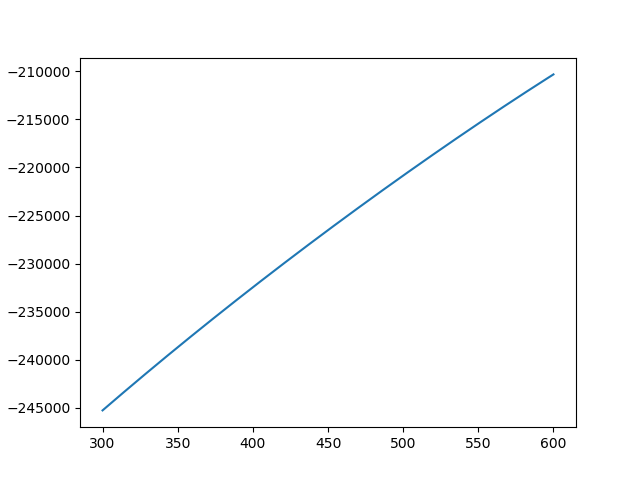

In [32]:
temp=np.linspace(300,600,1000)
w2=db.set_compound('H2O(L)')
o22=db.set_compound('O2')
hw=[w2.gibbs_energy(x)-o22.gibbs_energy(x) for x in temp]
%matplotlib notebook
plt.plot(temp,hw)


In [332]:
print(h2o2.h_formation)
print(h2o2.enthalpy(350)-h2o2.enthalpy(300))
print(h2o2.enthalpy_engineering(350)-h2o2.enthalpy_engineering(300))
print(h2o2.enthalpy_massic(350)-h2o2.enthalpy_massic(300))
print(h2o2.mm)
print(h2o2.h_formation/h2o2.mm)
print(h2o2.enthalpy(350)/h2o2.mm)
print(h2o2.enthalpy_engineering(350)/h2o2.mm+h2o2.h_formation)


-285828.6933708136
3761.757726381824
3761.757726381824
208809.2844730597
0.01801528
-15865903.464770662
216543.9571343206
-15935188.201007154


In [304]:
db2.set_compound("H2O")

<element> H2O

In [330]:
h2o.enthalpy(350)-h2o.enthalpy(300)

4027.322375000047

In [327]:
h2o.enthalpy_of_formation

-285830.0

In [33]:
%matplotlib notebook
temp=np.linspace(273.15,1000,1000)
h_h2o2 = [h2o2.enthalpy_engineering(x) for x in temp]
plt.plot(temp,h_h2o2)
h_h2o2 = [h2o2.enthalpy(x) for x in temp]
plt.plot(temp,h_h2o2)
temp=np.linspace(273.15,600,1000)
h_h2o = [h2o.enthalpy(x) for x in temp]
plt.plot(temp,h_h2o)
plt.plot([200,1000],[-291.83e3,-291.83e3])
plt.grid()

NameError: name 'h2o2' is not defined

<IPython.core.display.Javascript object>


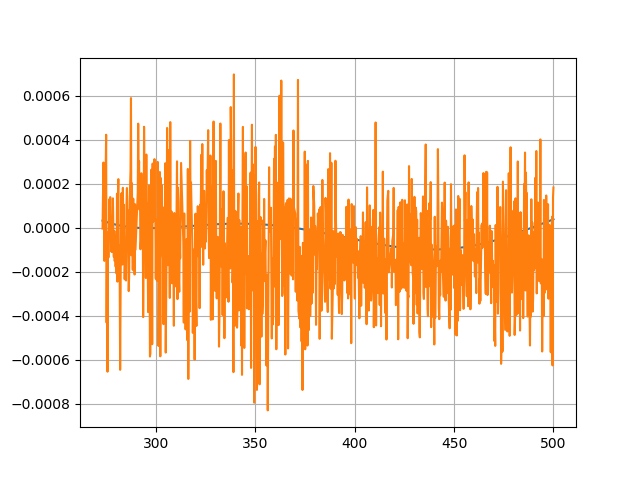

In [452]:
%matplotlib notebook
temp=np.linspace(273.15,500,1000)
T2=temp.reshape(1000,-1)/1000
Ta=np.hstack((T2,T2**2/2,T2**3/3,T2**4/4,-1/T2,np.ones(T2.shape),np.zeros(T2.shape),0*np.ones(T2.shape)))
h22=np.dot(Ta,cc)
h_h2o2 = [h2o2.enthalpy_engineering(x) for x in temp]
plt.plot(temp,(h_h2o2-1e3*h22)/(1e3*h22))
temp=np.linspace(273.15,500,1000)
T2=temp.reshape(1000,-1)/1000
Ta=np.hstack((T2,T2**2/2,T2**3/3,T2**4/4,-1/T2,np.ones(T2.shape),np.zeros(T2.shape),0*np.ones(T2.shape)))
h22=np.dot(Ta,cc)
h_h2o = [h2o.enthalpy(x) for x in temp]
plt.plot(temp,(h_h2o-1e3*h22)/(1e3*h22))
#plt.plot(temp,1e3*h22)
#plt.plot([200,1000],[-291.83e3,-291.83e3])
plt.grid()

In [382]:
h2o2.enthalpy_engineering(1000)

152339.61925717478

In [395]:
h2o2._low_coefs

array([ 7.25575005e+01, -6.62445402e-01,  2.56198746e-03, -4.36591923e-06,
        2.78178981e-09, -4.18865499e+04, -2.88280137e+02])

In [654]:
coefficients = np.empty(9, dtype=np.float128)
h2o=db.set_compound("H2O(L)")
for (i, coef) in enumerate(h2o._xml_compound.findall(
    'T_range')[h2o._evaluate_temperature_interval(300)]):
    coefficients[i]=np.array(coef.text, dtype=np.float128)
coefficients

array([ 1.32637130e+09, -2.44829539e+07,  1.87942878e+05, -7.67899505e+02,
        1.76155681e+00, -2.15116713e-03,  1.09257081e-06,  1.10176048e+08,
       -9.77970097e+05], dtype=float128)

In [413]:
for b in a.items():
    b

In [417]:
cc=np.array([-203.6060,1523.290,-3196.413,2474.455,3.855326,-256.5478,-488.7163,-285.8304])

In [441]:
T2=temp.reshape(1000,-1)/1000
Ta=np.hstack((T2,T2**2/2,T2**3/3,T2**4/4,-1/T2,np.ones(T2.shape),np.zeros(T2.shape),0*np.ones(T2.shape)))
h22=np.dot(Ta,cc)

In [438]:
Ta

array([[ 2.73150000e+02,  3.73054612e+04,  6.79332449e+06, ...,
         1.00000000e+00,  0.00000000e+00, -1.00000000e+00],
       [ 2.73477177e+02,  3.73948832e+04,  6.81776474e+06, ...,
         1.00000000e+00,  0.00000000e+00, -1.00000000e+00],
       [ 2.73804354e+02,  3.74844122e+04,  6.84226353e+06, ...,
         1.00000000e+00,  0.00000000e+00, -1.00000000e+00],
       ...,
       [ 5.99345646e+02,  1.79607601e+05,  7.17646892e+07, ...,
         1.00000000e+00,  0.00000000e+00, -1.00000000e+00],
       [ 5.99672823e+02,  1.79803747e+05,  7.18822804e+07, ...,
         1.00000000e+00,  0.00000000e+00, -1.00000000e+00],
       [ 6.00000000e+02,  1.80000000e+05,  7.20000000e+07, ...,
         1.00000000e+00,  0.00000000e+00, -1.00000000e+00]])

In [454]:
al2so3 = db.set_compound('AL2O3')

In [455]:
al2so3.enthalpy(300)

-546726.977024707

In [456]:
(251.0 - 0.12) * 1e3

250880.0

<IPython.core.display.Javascript object>


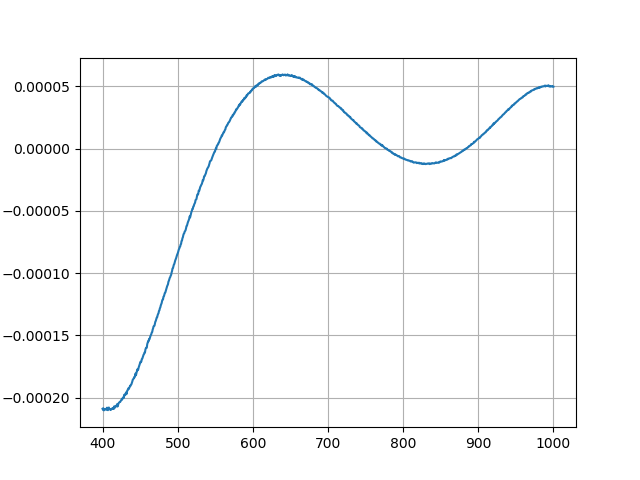

In [472]:
Tlow=400
Thigh=1000
temp=np.linspace(Tlow,Thigh,1000)
h2_nist_cc = [33.066178,-11.363417,11.432816,-2.772874,-0.158558,-9.980797,172.707974,0.0]
T2=temp.reshape(1000,-1)/1000
Ta=np.hstack((T2,T2**2/2,T2**3/3,T2**4/4,-1/T2,np.ones(T2.shape),np.zeros(T2.shape),0*np.ones(T2.shape)))
eth=np.dot(Ta,h2_nist_cc)
spcs = db.set_compound('H2')
%matplotlib notebook
ethc = [spcs.enthalpy(x) for x in temp]
#plt.plot(temp,ethc)
plt.plot(temp,(eth*1e3-ethc)/eth/1e3)
plt.grid()

<IPython.core.display.Javascript object>


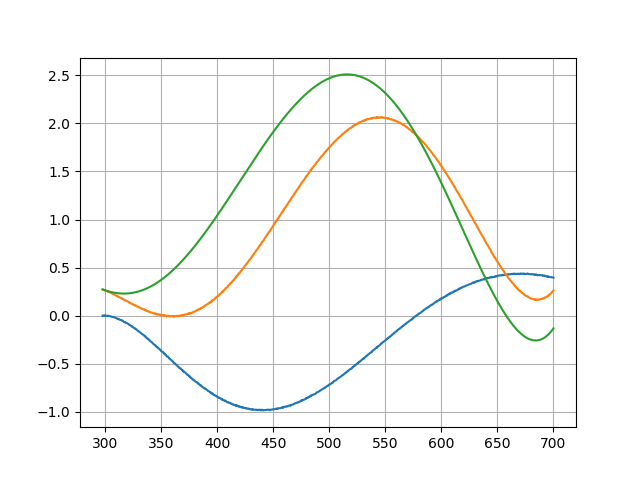

In [510]:
Tlow=298
Thigh=700
temp=np.linspace(Tlow,Thigh,1000)
o2_nist_cc = [31.32234,-20.23531,57.86644,-36.50624,-0.007374,-8.903471,246.7945,0.0]
T2=temp.reshape(1000,-1)/1000
Ta=np.hstack((T2,T2**2/2,T2**3/3,T2**4/4,-1/T2,np.ones(T2.shape),np.zeros(T2.shape),0*np.ones(T2.shape)))
eth=np.dot(Ta,o2_nist_cc)
spcs = db.set_compound('O2')
spcs2 = db2.set_compound('o2 ref element')
%matplotlib notebook
ethc = np.array([spcs.enthalpy(x) for x in temp])
ethc2 = np.array([spcs2.enthalpy_engineering(x) for x in temp])
plt.plot(temp,ethc-ethc2)
#plt.plot(temp,eth*1e3)
plt.plot(temp,ethc-(eth*1e3))
plt.plot(temp,ethc2-(eth*1e3))
plt.grid()

<IPython.core.display.Javascript object>


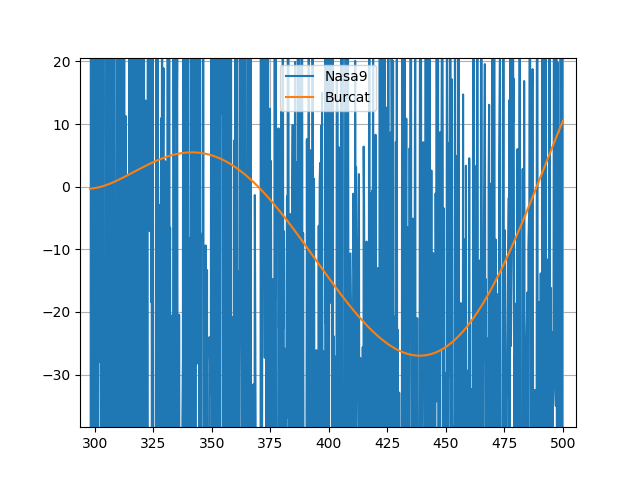

In [679]:
from thermopy.constants import ideal_gas_constant
_R = ideal_gas_constant[0]
Tlow=298
Thigh=500
temp=np.linspace(Tlow,Thigh,1000)
h2o_nist_cc=np.array([-203.6060,1523.290,-3196.413,2474.455,3.855326,-256.5478,-488.7163,-285.8304])
T2=temp.reshape(1000,-1)/1000
Ta=np.hstack((T2,T2**2/2,T2**3/3,T2**4/4,-1/T2,np.ones(T2.shape),np.zeros(T2.shape),0*np.ones(T2.shape)))

coefficients = np.empty(9)
h2o=db.set_compound("H2O(L)")
for (i, coef) in enumerate(h2o._xml_compound.findall(
    'T_range')[h2o._evaluate_temperature_interval(300)]):
    coefficients[i]=np.array(coef.text)
coefficients
T3=temp.reshape(1000,-1)
Tn=np.hstack((-1/T3**2,np.log(T3)/T3,np.ones(T3.shape),T3/2,T3**2/3,T3**3/4,T3**4/5,1/T3))

eth=np.dot(Ta,h2o_nist_cc)
ethn=np.dot(Tn,coefficients[:8])
spcs = db.set_compound('H2O(L)')
spcs2 = db2.set_compound('h2o(L)')
%matplotlib notebook
ethc = np.array([spcs.enthalpy(x) for x in temp])
ethc2 = np.array([spcs2.enthalpy_engineering(x) for x in temp])
#plt.plot(temp,(eth*1e3-ethc)/(eth*1e3),label="NIST")
plt.plot(temp,(eth*1e3-ethc),label="Nasa9")
plt.plot(temp,(eth*1e3-ethc2),label="Burcat")
#plt.plot(temp,temp*ethn*_R,label="Nasa9_2")

plt.legend()
plt.grid()

In [698]:
spcs.enthalpy(temp)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [493]:
eth[-1]*1e3

11748.712064388092

In [686]:
Water(1.0e5, 350, massic_basis=False).enthalpy()-0*Water(1.0e5, 300, massic_basis=False).enthalpy()

5796.90074451275

In [697]:
(spcs.enthalpy(349.8)+spcs.enthalpy(349.85)+spcs.enthalpy(349.9)+spcs.enthalpy(349.95)+
 spcs.enthalpy(350.0)+
 spcs.enthalpy(350.05)+spcs.enthalpy(350.1)+spcs.enthalpy(350.15)+spcs.enthalpy(350.2))/9

-281932.7331750542

In [688]:
(spcs2.enthalpy_engineering(350)-0*spcs2.enthalpy_engineering(300))

-281927.59335073084

In [615]:
(spcs2.enthalpy(350)-spcs2.enthalpy(300))

1686.7454862333252

In [617]:
spcs.heat_capacity(350)/spcs.molecular_weight

1880.6458579807916

In [608]:
ethw=[Water(p, 350, massic_basis=False).heat_capacity() for p in np.logspace(3,6,1000)]

<IPython.core.display.Javascript object>


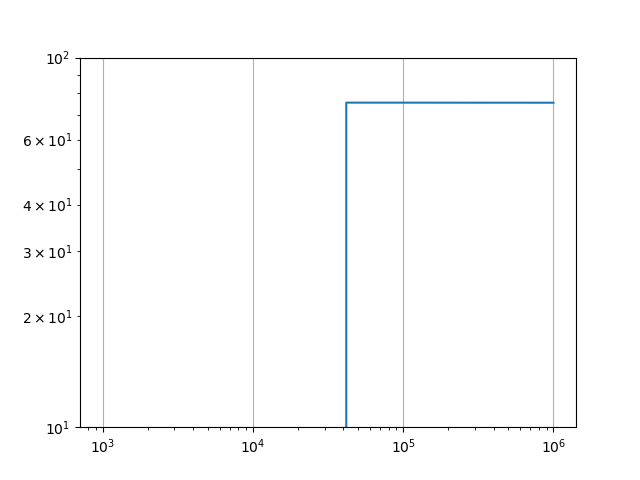

(10, 100.0)

In [609]:
P=np.logspace(3,6,1000)
%matplotlib notebook
plt.loglog(P,ethw)
plt.grid()
plt.ylim(10,1e2)

In [614]:
Water(3.0e6, 300, massic_basis=True).heat_capacity()

4.173012184067787

In [620]:
db.list_compound('water')

TypeError: 'NoneType' object is not iterable

In [731]:
T=np.array([300,400,600,1000])
eth=np.full(T.shape,np.nan)
eth[:]=np.nan
print(eth)
for (i, Trange) in enumerate(spcs._xml_compound.findall('T_range')):
    ss=np.logical_and(float(Trange.attrib['Tlow']) <= T, T <= float(Trange.attrib['Thigh']))
    eth[ss]=(i+1)*T[ss]
print(any(np.isnan(eth)))

[nan nan nan nan]
True


In [722]:
eth

array([                 300,                  800,                 1200,
       -9223372036854775808])

In [725]:
np.nan+1

nan

In [733]:
T.reshape((-1,1))

array([[ 300],
       [ 400],
       [ 600],
       [1000]])

In [734]:
np.min(T.shape)

4

In [735]:
T.shape

(4,)

In [744]:
np.dot(np.stack((T,T),axis=-1),[1,2])

array([ 900, 1200, 1800, 3000])

In [746]:
T=np.linspace(600,700,2)
T.reshape()

array([600., 700.])

In [763]:
db.list_compound("fecl")

[('FeCl', 'iron(3+);chloride')]

<IPython.core.display.Javascript object>


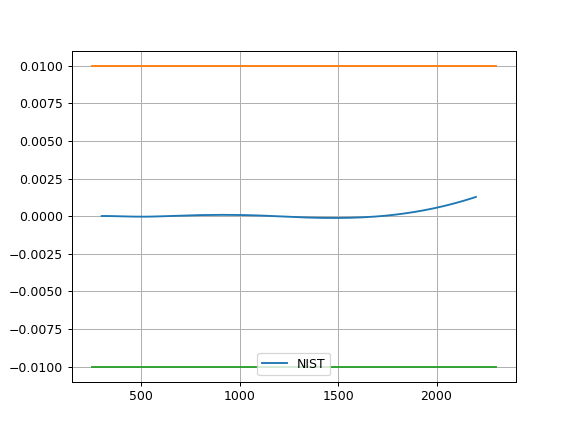

In [761]:
Tlow=300
Thigh=2200
temp=np.linspace(Tlow,Thigh,1000)
al2so3_nist_cc=[102.4290,38.74980,-15.91090,2.628181,-3.007551,-1717.930,146.9970,-1675.690]
T2=temp.reshape(1000,-1)/1000
Ta=np.hstack((T2,T2**2/2,T2**3/3,T2**4/4,-1/T2,np.ones(T2.shape),np.zeros(T2.shape),0*np.ones(T2.shape)))
eth=np.dot(Ta,al2so3_nist_cc)
spcs = db.set_compound('Al2O3(a)')
%matplotlib notebook
ethc = np.array([spcs.enthalpy(x) for x in temp])
#plt.plot(temp,ethc,label="NASA9")
plt.plot(temp,((eth*1e3)-ethc)/ethc,label="NIST")
plt.plot([250,2300],[1/100,1/100])
plt.plot([250,2300],[-1/100,-1/100])
plt.legend()
plt.grid()

In [767]:
cap=db2.set_compound("Ca+")

In [768]:
cap._elements

[('CA', 1), ('E', -1)]

In [769]:
reacts4=(O2,CO)
prods4=(CO2,)
reacts4_coefs=(1,2)
prods4_coefs=(2,)
reaction4 = nasa9.Reaction(1000, reacts4,prods4,reacts4_coefs, prods4_coefs)
print(reaction4)
print(reaction4.equilibrium_constant())

<reaction> +1 O2 +2 CO  -> +2 CO2 
2.7003082341467406e+20


In [34]:
O=db.set_compound("O")
O2=db.set_compound("O2")
NO=db.set_compound("NO")
NO2=db.set_compound("NO2")

In [35]:
print(O.enthalpy(296))
print(O2.enthalpy(296))
print(NO.enthalpy(296))
print(NO2.enthalpy(296))


249126.74062727555
-63.15195391106283
91206.6837309218
34113.0048306715


In [36]:
reacts5=(NO,O2)
prods5=(NO2,)
reacts5_coefs=(2,1)
prods5_coefs=(2,)
reaction5 = nasa9.Reaction(296, reacts5,prods5,reacts5_coefs, prods5_coefs)
print(reaction5)
print("{:e}".format(reaction5.equilibrium_constant()))

<reaction> +2 NO +1 O2  -> +2 NO2 
3.181182e+12


In [37]:
spc=db2.set_compound("O2 REF ELEMENT")
spc._elements

[('O', 2)]

In [38]:
N2O=db2.set_compound("N2O")
N2=db2.set_compound("N2 REF ELEMENT")
O2=db2.set_compound("O2 REF ELEMENT")
prods=(O2,N2)
reacts=(N2O,)
reacts_coefs=(2,)
prods_coefs=(1,2)
print(N2O.gibbs_energy(298))
print(N2.gibbs_energy(298))
print(O2.gibbs_energy(298))
print(N2O.enthalpy_engineering(298))
print(N2.enthalpy_engineering(298))
print(O2.enthalpy_engineering(298))
print((-O2.gibbs_energy(298)-2*N2.gibbs_energy(298)+2*N2O.gibbs_energy(298))/2)

16037.046440773192
-57099.43415243858
-61134.2629008421
81593.83315775846
-4.368620949036644
-4.406653843497504
103703.61204363282


In [39]:
N2O=db.set_compound("N2O")
N2=db.set_compound("N2")
O2=db.set_compound("O2")
prods=(O2,N2)
reacts=(N2O,)
reacts_coefs=(2,)
prods_coefs=(1,2)
print(N2O.gibbs_energy(298))
print(N2.gibbs_energy(298))
print(O2.gibbs_energy(298))
print(N2O.enthalpy(298))
print(N2.enthalpy(298))
print(O2.enthalpy(298))
print((-O2.gibbs_energy(298)-2*N2.gibbs_energy(298)+2*N2O.gibbs_energy(298))/2)
reaction = nasa9.Reaction(296, reacts,prods,reacts_coefs, prods_coefs)
print(reaction.gibbs_energy_reaction())

16037.028995932415
-57099.434177578674
-61134.262992335236
81593.83343345653
-4.368621477730922
-4.4066905937724465
103703.5946696787
-207110.57246744138


In [831]:
print(N2O.enthalpy_engineering(298))
print(N2O.entropy(298)*298)
print(N2O.enthalpy_engineering(298)-N2O.entropy(298)*298)

81593.83315775846
65556.78671698527
16037.046440773192
